In [1]:
# загружаем библиотеки
import pandas as pd
from folium import Map, Choropleth, Marker
from folium.plugins import MarkerCluster
from folium.features import CustomIcon

In [2]:
# загружаем файл
df = pd.read_excel(r"C:\Users\Sviridov\Pet project\Geo\raskodirovat_rasshifrovano.xlsx")
df.head()

,Наименование,Адрес,Геолокация,Город,Регион,Отрасли
0,"Тройка, кафе-кондитерская","Загородный проспект, 27","59.924217, 30.337086",Санкт-Петербург,Санкт-Петербург,"Кафе-кондитерские, Доставка еды, Кофейни"
1,"Organic Origin, гастромаркет натуральных проду...","набережная Макарова, 60 ст1","59.957449, 30.242566",Санкт-Петербург,Санкт-Петербург,"Кафе-кондитерские, Доставка еды, Кофейни"
2,"Simеle Fеod, кофе-сеолоеая","Пулковское шоссе, 28 лит А","59.825656, 30.326163",Санкт-Петербург,Санкт-Петербург,"Столовые, Кофейни"
3,"Secret Garden, гастрономический ресторан","Каменноостровский проспект, 42","59.966782, 30.309607",Санкт-Петербург,Санкт-Петербург,"Кафе-кондитерские, Кофейни"
4,Wedding cafe by Jully Bride,"Петроградская набережная, 18","59.959070, 30.334499",Санкт-Петербург,Санкт-Петербург,"Кафе-кондитерские, Кофейни"


In [3]:
# выделяем широту т долготу в отдельные столбцы
df['lat'] = df['Геолокация'].str[:9]
df['long'] = df['Геолокация'].str[10:20]
df.head()

,Наименование,Адрес,Геолокация,Город,Регион,Отрасли,lat,long
0,"Тройка, кафе-кондитерская","Загородный проспект, 27","59.924217, 30.337086",Санкт-Петербург,Санкт-Петербург,"Кафе-кондитерские, Доставка еды, Кофейни",59.924217,30.337086
1,"Organic Origin, гастромаркет натуральных проду...","набережная Макарова, 60 ст1","59.957449, 30.242566",Санкт-Петербург,Санкт-Петербург,"Кафе-кондитерские, Доставка еды, Кофейни",59.957449,30.242566
2,"Simеle Fеod, кофе-сеолоеая","Пулковское шоссе, 28 лит А","59.825656, 30.326163",Санкт-Петербург,Санкт-Петербург,"Столовые, Кофейни",59.825656,30.326163
3,"Secret Garden, гастрономический ресторан","Каменноостровский проспект, 42","59.966782, 30.309607",Санкт-Петербург,Санкт-Петербург,"Кафе-кондитерские, Кофейни",59.966782,30.309607
4,Wedding cafe by Jully Bride,"Петроградская набережная, 18","59.959070, 30.334499",Санкт-Петербург,Санкт-Петербург,"Кафе-кондитерские, Кофейни",59.959070,30.334499



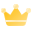

In [4]:
# создаём карту СПБ
spb_lat, spb_lng = 59.934280, 30.335099
m = Map(location=[spb_lat, spb_lng], zoom_start=10, tiles='Cartodb Positron')

# создаем кластер
marker_cluster = MarkerCluster().add_to(m)

def create_clusters(row):
    Marker(
        [row['lat'], row['long']],
        popup=f"{row['Наименование']}",
    ).add_to(marker_cluster)

df.apply(create_clusters, axis=1)

# добавляем маркер Эрмитажа
icon_ermitage = r"C:\Users\Sviridov\Pet project\Geo\эрмитаж.png"
Marker(
    ['59.939864', '30.314566'],
    popup=f"эрмитаж",
    icon = CustomIcon(icon_ermitage, icon_size=(50, 50))
).add_to(m)

m


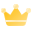

In [5]:
# создаем вариант карты без кластеров
m1 = Map(location=[spb_lat, spb_lng], zoom_start=10, tiles='Cartodb Positron')

def create_marker(row):
    Marker([row['lat'], row['long']],
        popup=f"{row['Наименование']}"
    ).add_to(m1)
    
df.apply(create_marker, axis=1)

Marker(
    ['59.939864', '30.314566'],
    popup=f"эрмитаж",
    icon = CustomIcon(icon_ermitage, icon_size=(50, 50))
).add_to(m1)

m1